<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Mass_Shooting_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Cleaning Data**

In [3]:
import pandas 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import squarify
import nltk
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/Mass Shootings.csv')
data.head(5)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,...,-,Asian,M,https://www.cnn.com/us/live-news/half-moon-bay...,-,-,-,-,Spree,2023
1,LA dance studio mass shooting,"Monterey Park, California",1/21/23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,...,-,Asian,M,https://www.latimes.com/california/story/2023-...,https://www.latimes.com/california/story/2023-...,-,-,-,Mass,2023
2,Virginia Walmart shooting,"Chesapeake, Virginia",11/22/22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,-,...,-,Black,M,https://www.washingtonpost.com/dc-md-va/2022/1...,-,-,-,-,Mass,2022
3,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/22,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,22,yes,...,-,White,M,https://coloradosun.com/2022/11/20/club-q-shoo...,https://www.nytimes.com/2022/11/20/us/colorado...,-,-,-,Mass,2022
4,University of Virginia shooting,"Charlottesville, Virginia",11/13/22,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,22,-,...,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,https://dailyprogress.com/news/local/guns-and-...,-,-,-,-,Mass,2022


In [5]:
data.isnull().sum()

case                                0
location                            0
date                                0
summary                             0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
where_obtained                      0
weapon_type                         0
weapon_details                      1
race                                0
gender                              0
sources                             0
mental_health_sources               0
sources_additional_age              0
latitude                            0
longitude                           0
type                                0
year                                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              139 non-null    object
 1   location                          139 non-null    object
 2   date                              139 non-null    object
 3   summary                           139 non-null    object
 4   fatalities                        139 non-null    int64 
 5   injured                           139 non-null    object
 6   total_victims                     139 non-null    object
 7   location.1                        139 non-null    object
 8   age_of_shooter                    139 non-null    object
 9   prior_signs_mental_health_issues  139 non-null    object
 10  mental_health_details             139 non-null    object
 11  weapons_obtained_legally          139 non-null    object
 12  where_obtained        

In [7]:
data['age_of_shooter'].unique()

array(['67', '72', '31', '22', '15', '20', '21', '70', '23', '45', '18',
       '-', '57', '19', '44', '51', '36', '24', '40', '32', '28', '46',
       '26', '54', '29', '38', '17', '47', '37', '64', '43', '39', '25',
       '33', '27', '34', '42', '59', '41', '52', '16', '48', '66', '11',
       '35', '55', '50'], dtype=object)

In [8]:
data['injured'] = data['injured'].map({'1':'1', '10':'10', '6':'6', '25':'25', '2':'2',
                                       '46':'46','0':'0','(TK - "fewer than 10"':'5',
                                       '17':'17','3':'3','7':'7','8':'8','27':'27','26':'26',
                                       '12':'12','4':'4','22':'22','13':'13','20':'20','546':'546',
                                       '11':'11','53':'53','14':'14','21':'21','9':'9','70':'70',
                                       '31':'31','23':'23','5':'5','24':'24','19':'19','29':'29'})

data['location.1'] = data['location.1'].map({'workplace':'Workplace','Other':'Other','Workplace':'Workplace',
                                             'School':'School','religious':'Religious','Religious':'Religious',
                                             'Military':'Military','Airport':'Airport',
                                             '\nWorkplace':'Workplace','Other\n':'Other'})

data['age_of_shooter'] = data['age_of_shooter'].map({'67':'60-69','72':'70-+','31':'30-39','22':'20-29','15':'0-19',
                                                     '20':'20-29','21':'20-29','70':'70-+','23':'20-29','45':'40-49',
                                                     '18':'0-19','-':'-','57':'50-59','19':'0-19','44':'40-49','51':'50-59',
                                                     '36':'30-39', '24':'20-29',
                                                     '40':'40-49', '32':'30-39', '28':'20-29',
                                                     '46':'40-49','26':'20-29', '54':'50-59', '29':'20-29','38':'30-39','17':'0-19',
                                                     '47':'40-49', '37':'30-39', '64':'60-69', '43':'40-49', '39':'30-39', '25':'20-29',
                                                     '33':'30-39', '27':'20-29', '34':'30-39', '42':'40-49',
                                                     '59':'50-59', '41':'40-49', '52':'50-59', '16':'0-19', '48':'40-49', '66':'60-69', '11':'0-19',
                                                     '35':'30-39', '55':'50-59', '50':'50-59'})

data['prior_signs_mental_health_issues'] = data['prior_signs_mental_health_issues'].map({'-':'Unknown','yes':'yes','TBD':'TBD',
                                                                                         'Yes':'yes','Unclear':'Unknown',
                                                                                         'Unknown':'Unknown','No':'No','Unclear ':'Unknown'})
 
data['weapons_obtained_legally'] = data['weapons_obtained_legally'].map({'-':'TBD','yes':'yes','Yes':'yes',
                                                                         'No':'No','TBD':'TBD',
                                                                         'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI':'TBD',
                                                                         'Unknown':'TBD', '\nYes':'yes',
                                                                         'Yes ("some of the weapons were purchased legally and some of them may not have been")':'yes','Yes ':'yes'})

data['gender'] = data['gender'].map({'M':'Male','Male & Female':'Male & Female','F':'Female','Male':'Male','Female':'Female'})

data['race'] = data['race'].map({'Asian':'Asian','Black':'Black','White':'White',
                                 '-':'Other','Latino':'Latino','Other':'Other',
                                 'White ':'White','Native American':'Native American',
                                 'white':'White','black':'Black','unclear':'Other'})


In [9]:
data['injured'] = pd.to_numeric(data['injured'])

In [10]:
shooting_data = data[['case','location','date','fatalities','injured','location.1','age_of_shooter',
                      'prior_signs_mental_health_issues','weapons_obtained_legally','weapon_type','race',
                      'gender','latitude','longitude','year']]

shooting_data.head()                      

,case,location,date,fatalities,injured,location.1,age_of_shooter,prior_signs_mental_health_issues,weapons_obtained_legally,weapon_type,race,gender,latitude,longitude,year
0,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/23,7,1,Workplace,60-69,Unknown,TBD,-,Asian,Male,-,-,2023
1,LA dance studio mass shooting,"Monterey Park, California",1/21/23,11,10,Other,70-+,yes,TBD,semiautomatic assault weapon (Details pending),Asian,Male,-,-,2023
2,Virginia Walmart shooting,"Chesapeake, Virginia",11/22/22,6,6,Workplace,30-39,Unknown,TBD,semiautomatic handgun,Black,Male,-,-,2022
3,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/22,5,25,Other,20-29,yes,TBD,semiautomatic rifle; semiautomatic handgun,White,Male,-,-,2022
4,University of Virginia shooting,"Charlottesville, Virginia",11/13/22,3,2,School,20-29,Unknown,yes,semiautomatic pistol,Black,Male,-,-,2022


In [11]:
shooting_data.to_csv('/content/drive/MyDrive/Colab Notebooks/2023/shooting_data.csv')

# **Exploring Data and making charts**

Text(0, 0.5, 'Quantity')

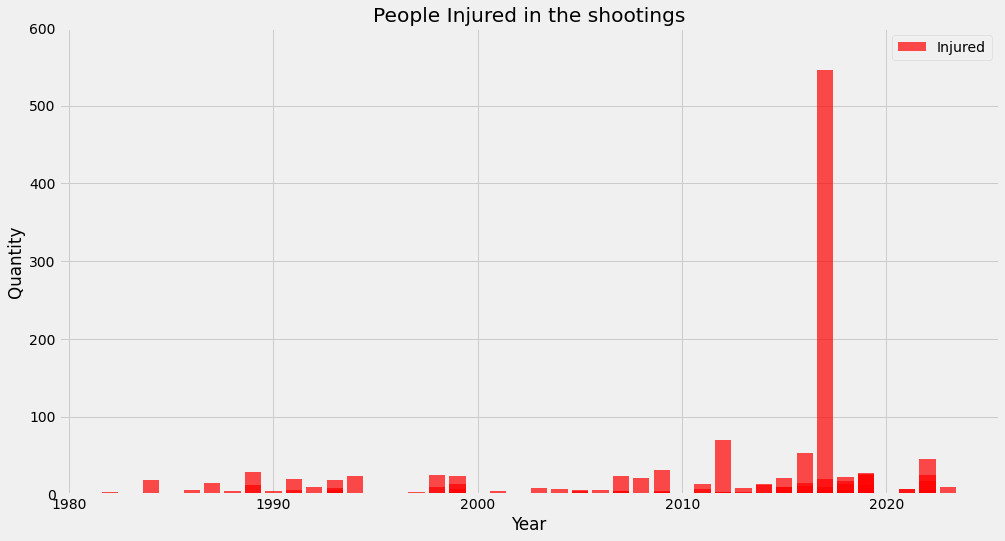

In [12]:
plt.figure(figsize=(15,8))
plt.bar(x=shooting_data['year'],height=shooting_data['injured'],label='Injured', color='r',alpha=0.7)
plt.legend()
plt.title('People Injured in the shootings')
plt.ylim(0,600)
plt.xlabel('Year')
plt.ylabel('Quantity')


Text(0, 0.5, 'Quantity')

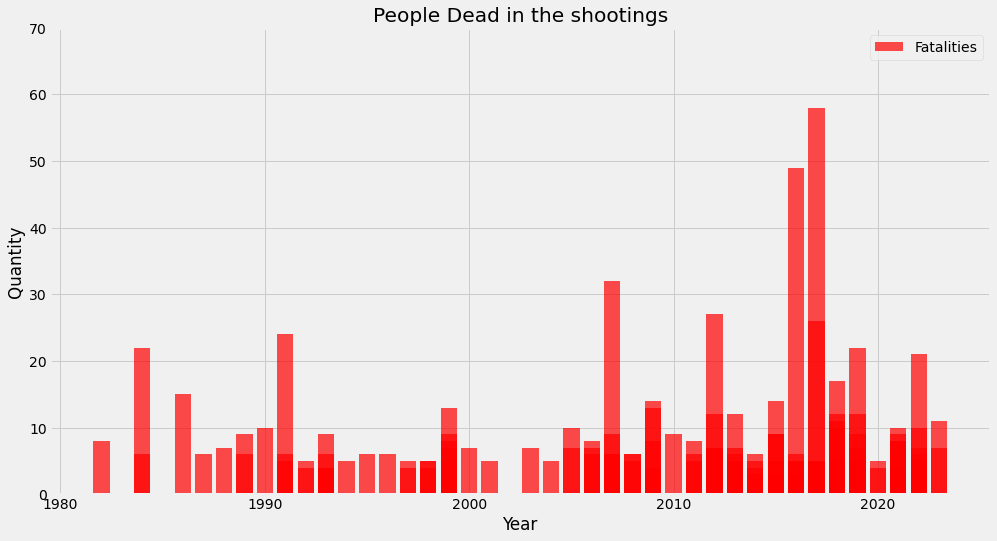

In [13]:
plt.figure(figsize=(15,8))
plt.bar(x=shooting_data['year'],height=shooting_data['fatalities'],label='Fatalities', color='r',alpha=0.7)
plt.legend()
plt.title('People Dead in the shootings')
plt.ylim(0,70)
plt.xlabel('Year')
plt.ylabel('Quantity')

In [14]:
px.bar(shooting_data, x='year', y='fatalities', title='People Dead in the shootings')

In [15]:
px.bar(shooting_data, x='year', y='fatalities', title='Places where shootings happened', color='location.1')

In [16]:
px.bar(shooting_data, x='year', y='fatalities', title='Race of the hitman´s', color='race')

In [17]:
px.bar(shooting_data, x='year', y='fatalities', title='Gender of the hitman´s', color='gender')

In [18]:
names = shooting_data['location.1']
values = shooting_data['fatalities']
px.pie(names=names, values=values, title="Places where shootings happened")

In [19]:
names = shooting_data['race']
values = shooting_data['fatalities']

px.pie(names=names,values=values,title="Race of the hitman´s")

In [20]:
names=shooting_data['gender']
values=shooting_data['fatalities']
px.pie(names=names,values=values, title="Gender of the hitman´s")

In [21]:
names=shooting_data['age_of_shooter']
values=shooting_data['fatalities']
px.pie(names=names,values=values, title="Range of age of hitman´s")

In [22]:
names=shooting_data['prior_signs_mental_health_issues']
values=shooting_data['fatalities']
px.pie(names=names, values=values, title="Prior signs of metal health issues")

In [23]:
guns = shooting_data.groupby('weapons_obtained_legally')['fatalities'].count()
guns

weapons_obtained_legally
No     16
TBD    30
yes    93
Name: fatalities, dtype: int64

(0.0, 100.0, 0.0, 100.0)

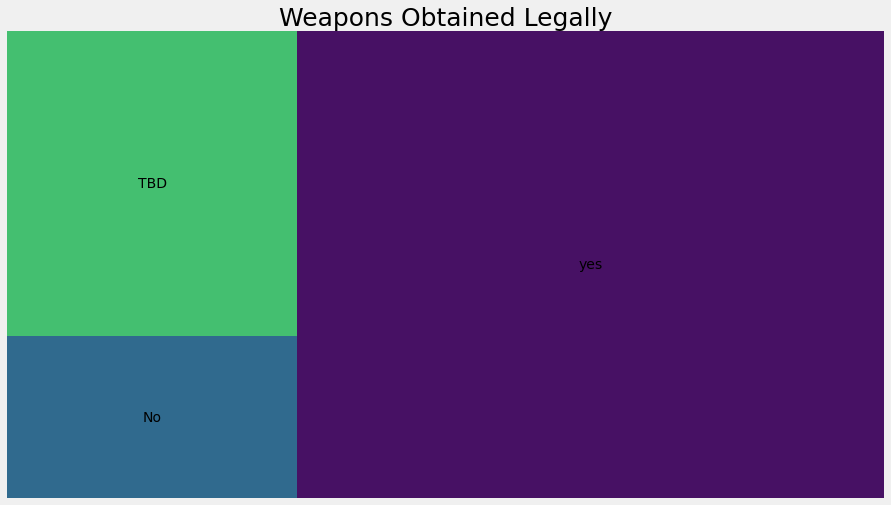

In [41]:
sizes= guns.values
label= guns.index

plt.figure(figsize=(14,8))
squarify.plot(sizes=sizes, label=label)
plt.title("Weapons Obtained Legally", fontsize=25)
plt.axis('off')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


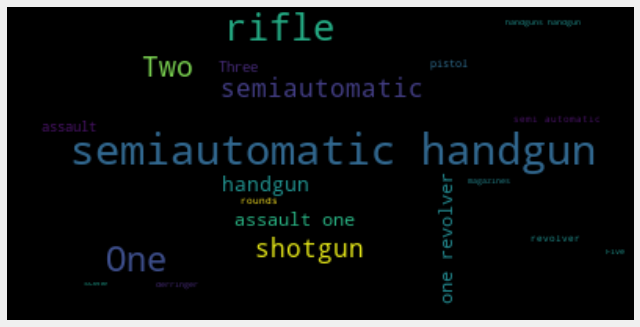

In [38]:
import nltk
nltk.download('stopwords') 

text=" ".join(i for i in shooting_data.weapon_type)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,max_words=50,
                      min_font_size=5,background_color='black').generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()